# Персонализация предложений постоянным клиентам для увеличения их покупательской активности

**Описание проекта:** Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений на основе анализа данных и бизнес-моделирования. 
    
**Цель исследования:** построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца. Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.
    
**Ход исследования:**

- Поготовка данных: загрузка и изучение общей информации из представленных данных.
- Предобработка данных.
- Исследовательский анализ данных: изучение всех представленных характеристик. 
- Корреляционный анализ всех характеристик, выявление мультиколлинеарности признаков.
- Создание итогового пайплана для выбора лучшей модели.
- Анализ важности признаков лучшей модели.
- Сегментация покупателей.
    
**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#market_file" data-toc-modified-id="market_file-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>market_file</a></span></li><li><span><a href="#market_money" data-toc-modified-id="market_money-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>market_money</a></span></li><li><span><a href="#market_time" data-toc-modified-id="market_time-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>market_time</a></span></li><li><span><a href="#money" data-toc-modified-id="money-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>money</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Использование-пайплайнов" data-toc-modified-id="Использование-пайплайнов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Использование пайплайнов</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Сегментация-покупателей" data-toc-modified-id="Сегментация-покупателей-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сегментация покупателей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных

In [1]:
!pip install phik -q

In [2]:
!pip install scikit-learn==1.1.3 -q

In [3]:
!pip install shap -q

In [4]:
!pip install matplotlib==3.5.1 -q

In [5]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import phik
import shap

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [6]:
# загрузка данных
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

In [7]:
# функция для просмотра общей информации о дф
def inform(df):
    return display(df.head()), df.info()

In [8]:
inform(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

(None, None)

In [9]:
inform(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


(None, None)

In [10]:
inform(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


(None, None)

In [11]:
inform(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


(None, None)

Всего 4 дф: 
- 1)содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении, 1300*12
- 2)данные о выручке, которую получает магазин с покупателя, 3900*3
- 3)данные о времени (в минутах), которое покупатель провёл на сайте в течение периода, 2600*3
- 4)данные о среднемесячной прибыли покупателя за последние 3 месяца, 1300*2

## Предобработка данных

In [12]:
# список всех дф
dfs = [market_file, market_money, market_time, money]

**Переименование столбцов**

In [13]:
# вывод названий колонок
for df in dfs:
    print(df.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')
Index(['id', 'Период', 'Выручка'], dtype='object')
Index(['id', 'Период', 'минут'], dtype='object')
Index(['id', 'Прибыль'], dtype='object')


In [14]:
# изменение названий
market_file.columns = ['id', 'покупательская_активность', 'тип_сервиса', 
                       'разрешить_сообщать','маркет_актив_6_мес', 'маркет_актив_тек_мес', 
                       'длительность','акционные_покупки', 'популярная_категория',
                       'средний_просмотр_категорий_за_визит',
                       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса','страниц_за_визит']

In [15]:
market_money.columns = ['id', 'период', 'выручка']

In [16]:
market_time.columns = ['id', 'период', 'минут']

In [17]:
money.columns = ['id', 'прибыль']

In [18]:
for df in dfs:
    print(df.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


**Поиск дубликатов**

In [19]:
# поиск явных дубликатов
for df in dfs:
    print(df.duplicated().sum())

0
0
0
0


In [20]:
# поиск неявных дубликатов
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [21]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

In [22]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [23]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [24]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

## Исследовательский анализ данных

### market_file

In [25]:
def show(y, xlabel, ylabel, title):
    ax = (market_file
          .query('покупательская_активность == "Снизилась"')
          .plot(
              kind='hist', 
              histtype='step',  
              y=y, 
              figsize=(12, 7), 
              bins=50, grid=True,
              linewidth=4,
              alpha=0.7,
              label='Снизилась'
          )
         )
    (
        market_file
        .query('покупательская_активность != "Снизилась"')
        .plot(
            kind='hist', 
            histtype='step',  
            y=y, 
            figsize=(12, 7),
            bins=50, 
            grid=True, 
            ax=ax,
            linewidth=4,
            alpha=0.7,
            label='Прежний уровень'
        )
    )
    plt.xlabel("\n" + xlabel, fontsize=14)
    plt.ylabel(ylabel + "\n", fontsize=14)
    plt.title(title + "\n", fontsize=16)
    plt.show()

In [26]:
# функция постороения гистограммы
def show_category(df, column, xlabel, ylabel, title):
    (
        df
        .pivot_table(index=column, values='id', aggfunc='count')
        .plot.bar(legend=False, rot=45, figsize=(12, 8))
    )
    plt.xlabel(xlabel + '\n', fontsize = 16)
    plt.ylabel('\n' + ylabel, fontsize = 16)
    plt.title(title + '\n', fontsize = 18)
    plt.show()

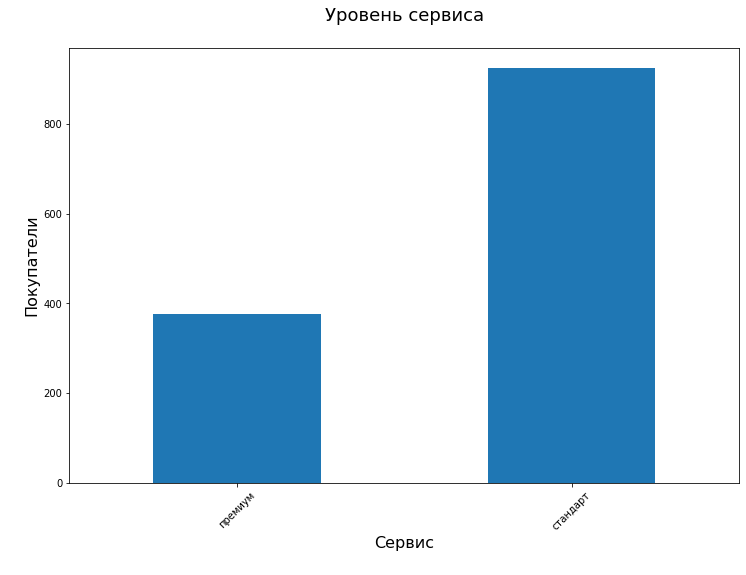

In [28]:
show_category(market_file, 'тип_сервиса', 'Сервис', 'Покупатели', "Уровень сервиса")

Преобладают покупатели с уровнем сервиса стандарт.

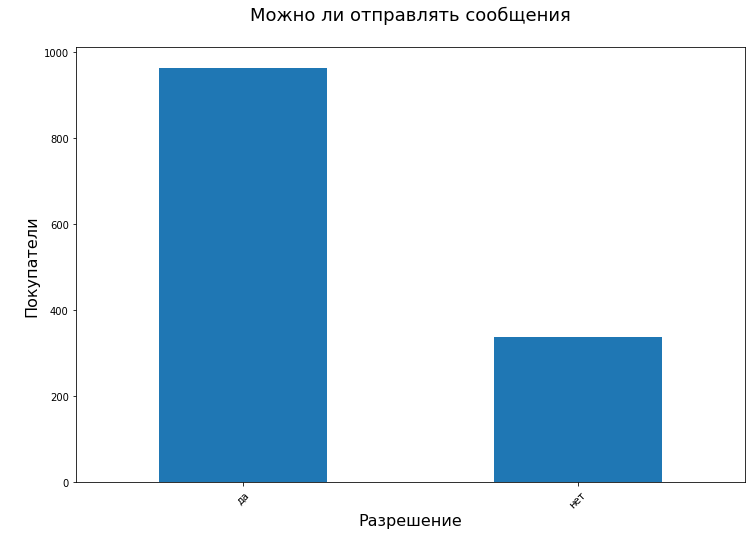

In [29]:
show_category(market_file, 'разрешить_сообщать', 'Разрешение', 'Покупатели', "Можно ли отправлять сообщения")

Большинство покупателей дали согласие на отправку сообщений.

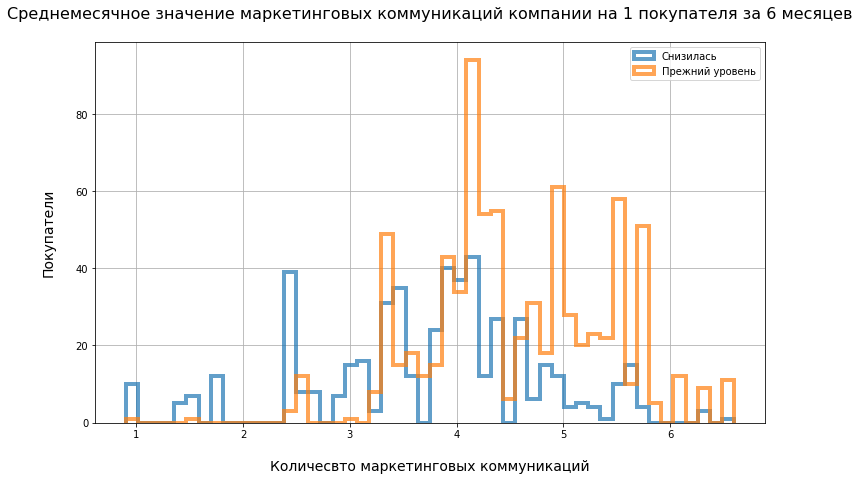

In [30]:
show('маркет_актив_6_мес', 
     'Количесвто маркетинговых коммуникаций', 
     'Покупатели', 
     'Среднемесячное значение маркетинговых коммуникаций компании на 1 покупателя за 6 месяцев'
    )

В месяц происходит около 4 маркетинговых коммуникаций с покупателем. Большинство пользователей, чья активность осталась на прежнем уровне, получают рассылок от 3.

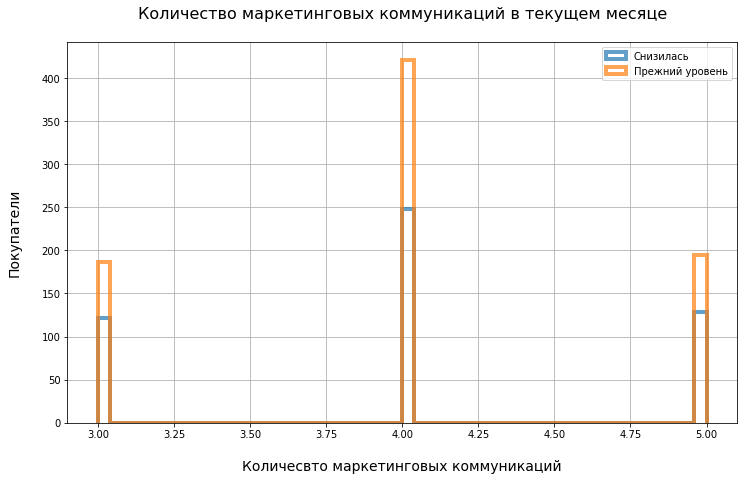

In [31]:
show('маркет_актив_тек_мес', 'Количесвто маркетинговых коммуникаций', 
     'Покупатели', 'Количество маркетинговых коммуникаций в текущем месяце')

В текущем месяце на каждого покупателя приходиться 3-5 маркетинговых коммуникаций.

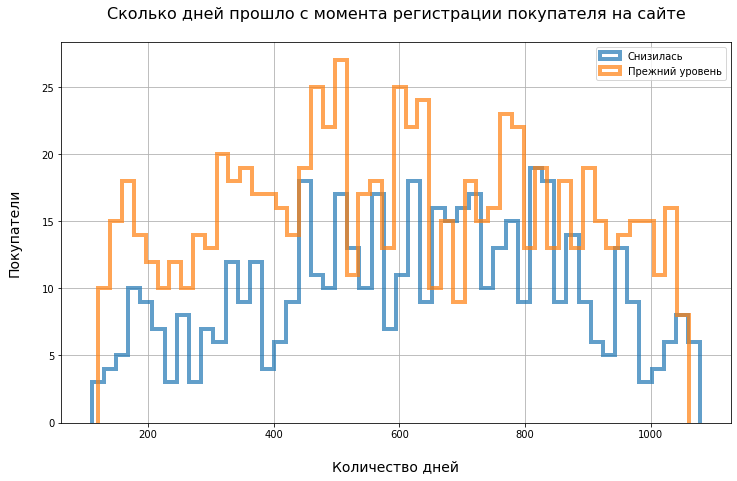

In [32]:
show('длительность', 'Количество дней', 'Покупатели', 
     'Сколько дней прошло с момента регистрации покупателя на сайте')

Большая часть покупателей зарегистрировалась на сайте в районе 400-800 дней (год-два) назад.

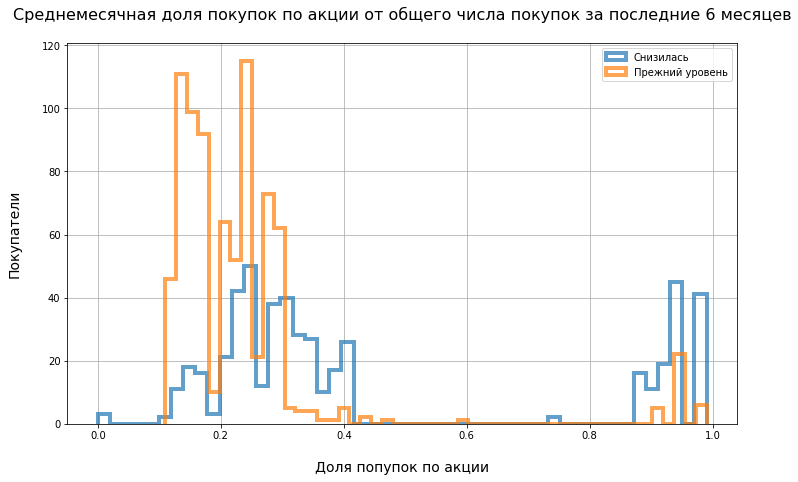

In [33]:
show('акционные_покупки', 'Доля попупок по акции', 'Покупатели', 
     'Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')

Присутствует группа покупателей, которые в основном покупают товары, в основном, только по акции. Также у большинства из них активность снизилась.

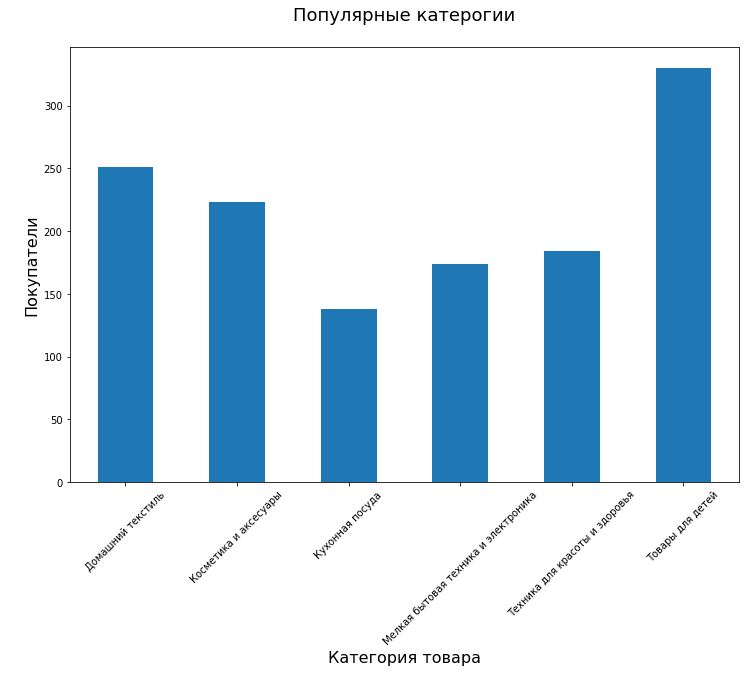

In [34]:
show_category(market_file, 'популярная_категория', 'Категория товара', 'Покупатели', "Популярные катерогии")

Самая популярная категория товаров - товары для детей. Наименьшим спросом обладает категория кухонной посуды.

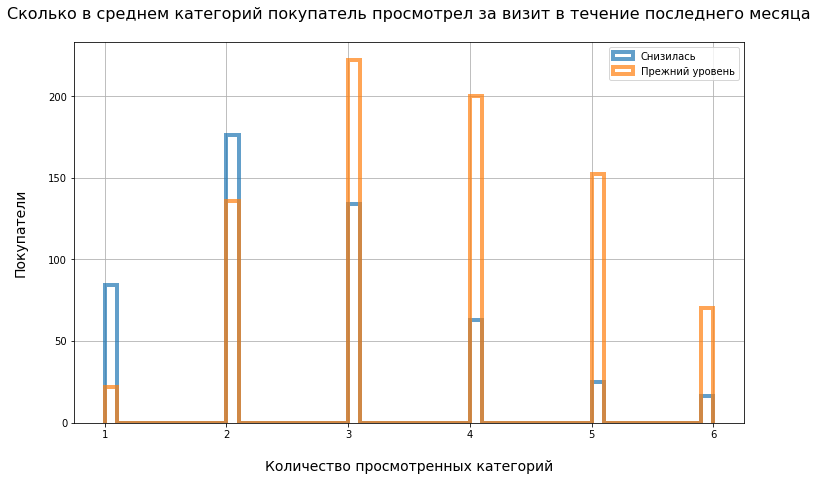

In [35]:
show('средний_просмотр_категорий_за_визит', 'Количество просмотренных категорий', 'Покупатели', 
     'Cколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца')

Большинство покупателей смотрят по 2-4 категории за визит.

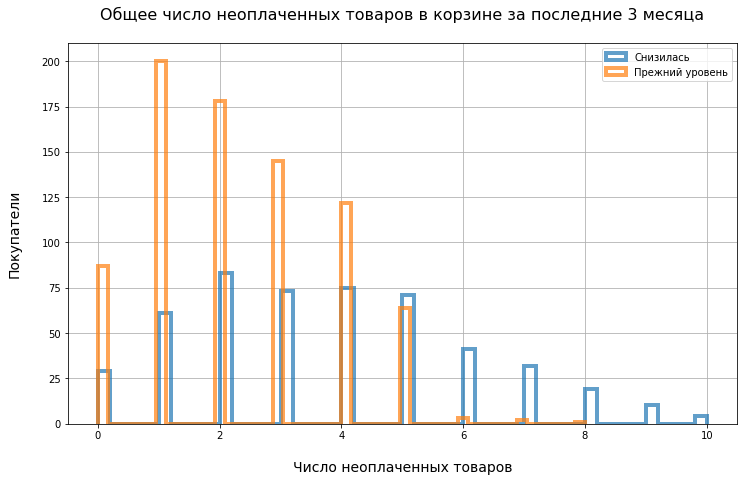

In [36]:
show('неоплаченные_продукты_штук_квартал', 'Число неоплаченных товаров', 'Покупатели', 
     'Общее число неоплаченных товаров в корзине за последние 3 месяца')

В основном, у покупателей в корзине до 5 неоплаченных товаров. У покупателей, чья активность снизилась, в корзине лежат до 10 неоплаченных товаров.

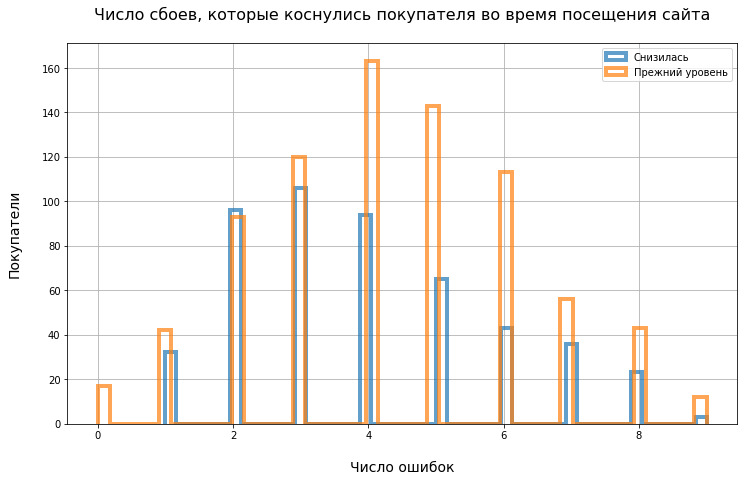

In [37]:
show( 'ошибка_сервиса', 'Число ошибок', 'Покупатели', 
              'Число сбоев, которые коснулись покупателя во время посещения сайта')

На сайте частенько происходят сбои.

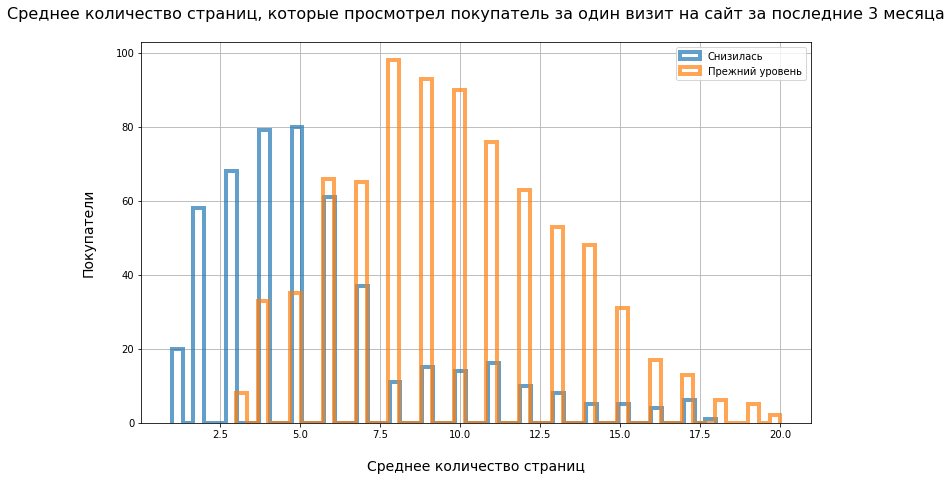

In [38]:
show('страниц_за_визит', 'Среднее количество страниц', 'Покупатели', 
     'Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца')

Покупатели за визит обычно смотрят по 5-11 страниц. Покупатели, чья активность снизилась,просматривают меньше страниц за визит.

### market_money

In [39]:
market_money = market_money.query('выручка > 0 and выручка < 10000')

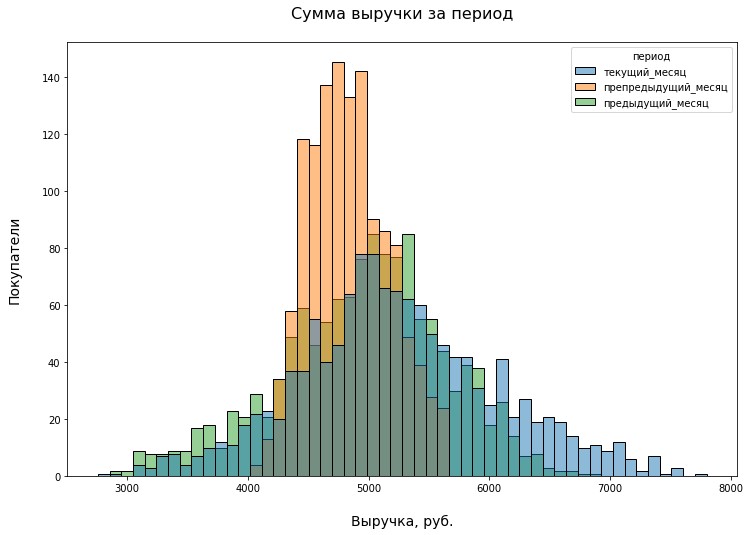

In [40]:
plt.figure(figsize=(12, 8))
sns.histplot(data=market_money, x='выручка', hue='период')
plt.xlabel("\n" + 'Выручка, руб.', fontsize=14)
plt.ylabel('Покупатели' + "\n", fontsize=14)
plt.title('Сумма выручки за период' + "\n", fontsize=16)
plt.show()

Большинство покупателей приносят выручку в районе от 4500 - 5300 руб. Также присутсвтвуют как покупатели, которые не делали покупок в какие-то месяца, так и те, кто совершил покупки более, чем на 100 тыс.р.

### market_time

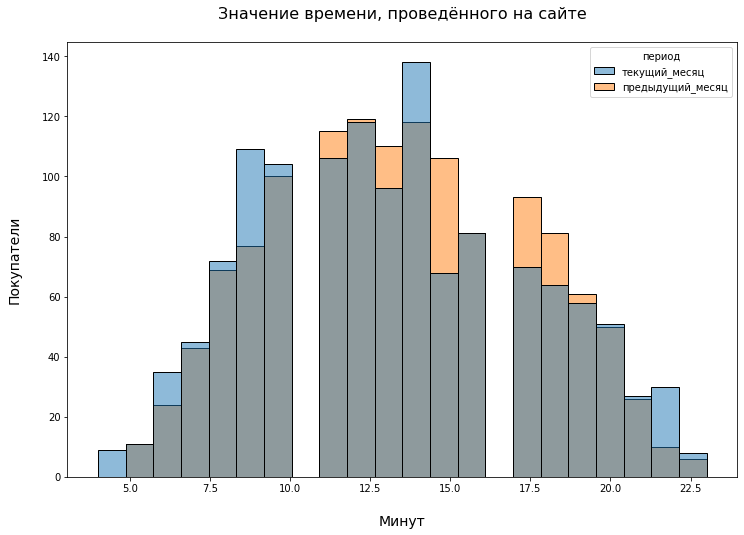

In [41]:
plt.figure(figsize=(12, 8))
sns.histplot(data=market_time, x='минут', hue='период')
plt.xlabel("\n" + 'Минут', fontsize=14)
plt.ylabel('Покупатели' + "\n", fontsize=14)
plt.title('Значение времени, проведённого на сайте' + "\n", fontsize=16)
plt.show()

Данные в времени на сайте за 2 месяца.

### money

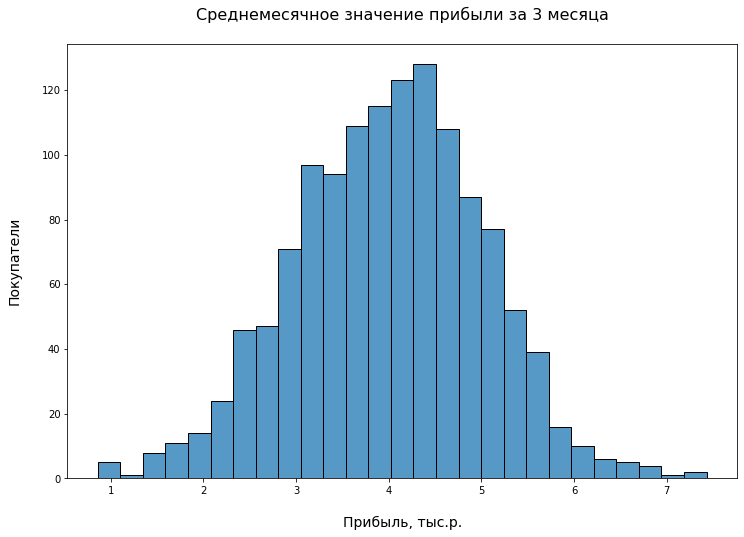

In [42]:
plt.figure(figsize=(12, 8))
sns.histplot(data=money, x='прибыль')
plt.xlabel("\n" + 'Прибыль, тыс.р.', fontsize=14)
plt.ylabel('Покупатели' + "\n", fontsize=14)
plt.title('Среднемесячное значение прибыли за 3 месяца' + "\n", fontsize=16)
plt.show()

Среднее значение прибыли составляет около 4 тыс.р.

### Вывод

- Преобладают покупатели со стандартным уровнем сервиса, с согласием на рассылку сообщений. Количество меркетинговых коммуникаций в месяц около 4. Больштнство покупателей зарегистрировалось на сайте около 1-2 года назад. Присутствует группа покупателей, которые в основном покупают товары, в основном, только по акции. Самая популярная категория товаров - товары для детей. Наименьшим спросом обладает категория кухонной посуды. Большинство покупателей смотрят по 2-4 категории за визит и 5-11 станиц, в корзине до 5 неоплаченных товаров. На сайте происходят сбои.
- Среднемесячная выручка за 3 месяца составляет 4500-5300 руб.
- Среднее время, проведенное на сайте за последнии 2 месяца составляет от 10 до 16 минут.

## Объединение таблиц

In [43]:
df1 = market_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')
df1.columns = ['выручка_за_предыдущий_месяц', 'выручка_за_препредыдущий_месяц', 'выручка_за_текущий_месяц']

In [44]:
df2 = market_time.pivot_table(index='id', columns='период', values='минут', aggfunc='sum')
df2.columns = ['минут_за_предыдущий_месяц', 'минут_за_текущий_месяц']

In [45]:
df = market_file.merge(df1, on='id', how='left')
df = df.merge(df2, on='id', how='left')
df = df.merge(money, on='id', how='left')

In [46]:
df = df.query('(выручка_за_препредыдущий_месяц > 0) and (выручка_за_предыдущий_месяц > 0) and (выручка_за_текущий_месяц > 0)')

In [47]:
df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,минут_за_предыдущий_месяц,минут_за_текущий_месяц,прибыль
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95


In [48]:
df.shape

(1296, 19)

В объединенном дф 19 признаков для 1296 покупателей.

## Корреляционный анализ

Text(0.5, 1.0, 'Матрица корреляции')

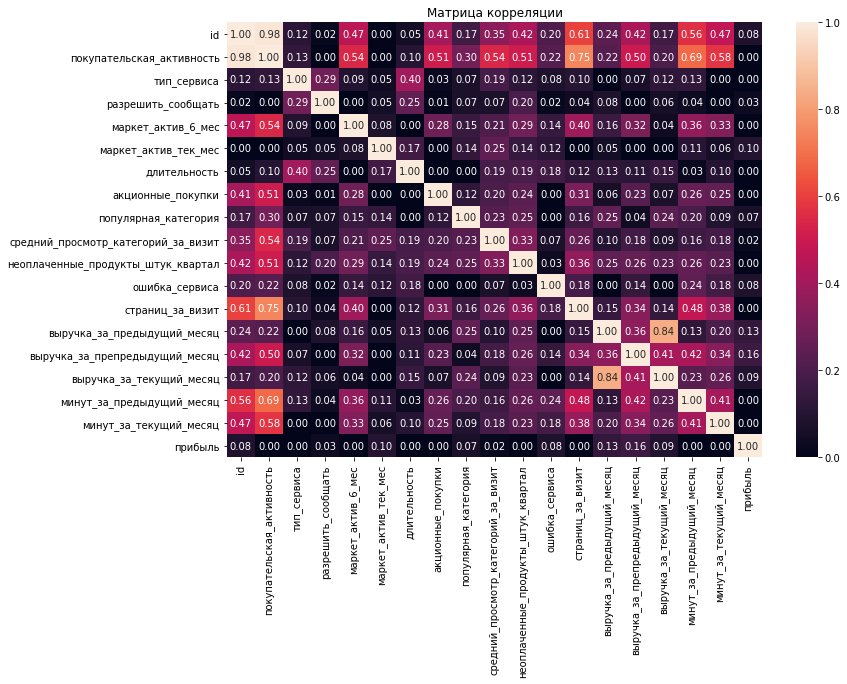

In [49]:
# матрица корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(df.phik_matrix(interval_cols=df.select_dtypes(include='number').columns.tolist()), annot=True, fmt='.2f')
plt.title('Матрица корреляции')

In [50]:
df = df.drop(['id'], axis=1)

## Использование пайплайнов

In [51]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['покупательская_активность'], axis=1),
    df['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['покупательская_активность'])

X_train.shape, X_test.shape

((972, 17), (324, 17))

'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 
'акционные_покупки', 'средний_просмотр_категорий_за_визит', 
'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
'выручка_за_препредыдущий_месяц', 'выручка_за_предыдущий_месяц', 
'выручка_за_текущий_месяц', 'минут_за_текущий_месяц', 'минут_за_предыдущий_месяц'

In [52]:
# списки признаков с разными типами данных 
ohe_columns = ["разрешить_сообщать", "популярная_категория"]
ord_columns = ["тип_сервиса"]
num_columns = df.select_dtypes(include='number').columns.tolist()

In [53]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

In [55]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough' # остальные столбцы пропускаются
)

In [56]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

In [57]:
# 
param_grid =  {
    'preprocessor__num': [
        StandardScaler(), 
        MinMaxScaler()
    ],
    'models': [
        KNeighborsClassifier(),        
        DecisionTreeClassifier(random_state=RANDOM_STATE),
        LogisticRegression(random_state=RANDOM_STATE),
        SVC(random_state=RANDOM_STATE)
    ]
} 

In [58]:
# словари с гиперпараметрами для различных моделей
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 5),
        'models__metric': ['euclidean', 'cityblock']
    },
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15)
    },
    
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 7)
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['linear', 'rbf', 'sigmoid']
    }
]

In [59]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions,
    cv=5, 
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

print('Метрика roc_auc для лучшей модели на кросс-валидации:\n', randomized_search.best_score_)
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Метрика roc_auc для лучшей модели на кросс-валидации:
 0.895590807336262
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                        

In [60]:
probabilities = randomized_search.predict_proba(X_test)[:, 1]
print(f'Площадь ROC-кривой: {round(roc_auc_score(y_test, probabilities), 2)}')

Площадь ROC-кривой: 0.92


Выбрана метрика roc_auc, так как она стоит кривую по оценке вероятности принадлежности к классу 1. Площадь под этой кривой в лучшем случае равна 1 и в помощью этого можно оценить качество модели.

Лучшая модель получилась KNeighborsClassifier с гиперпараметрами metric='euclidean', n_neighbors=10.

## Анализ важности признаков

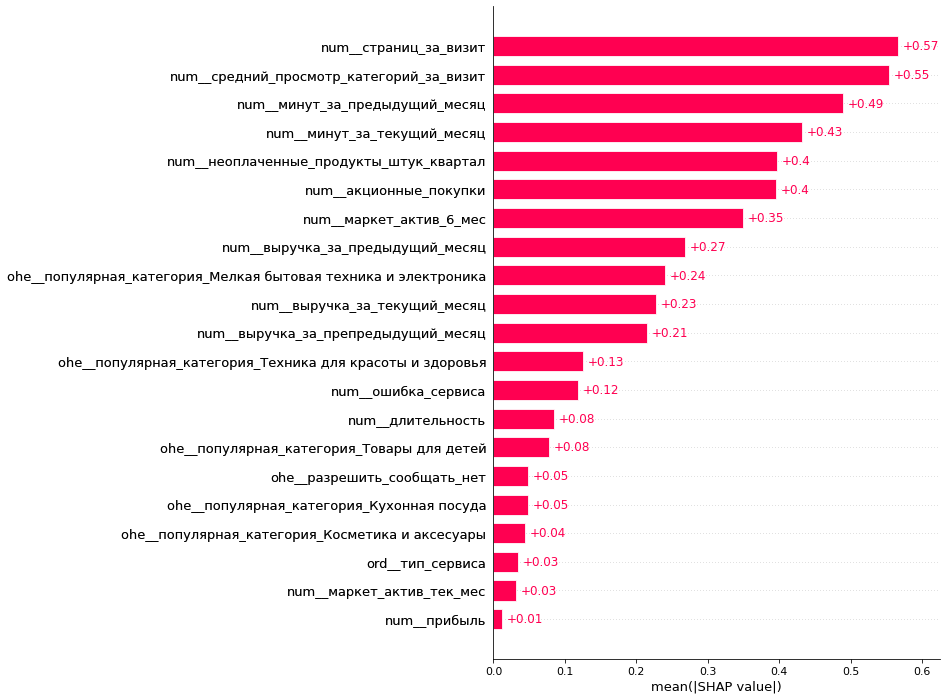

None

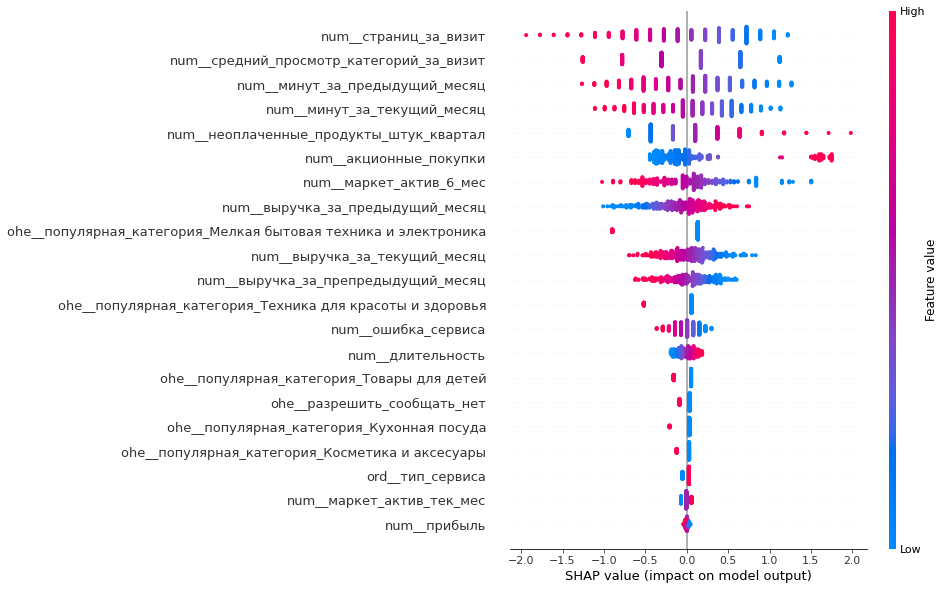

In [61]:
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)

explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

shap_values = explainer(X_test_2)

display(shap.plots.bar(shap_values, max_display=22))
shap.plots.beeswarm(shap_values, max_display=22)

Самые большие средние SHAP-значения у признаков посещение страниц за визит и среднее количество просмотренных категорий. Эти значения сильнее всего влияют на прогноз модели.

Чем больше значения страниц за визит, средний просмотр категорий, минут, проведенных на сайте, маркутинговая активность, тем меньше SHAP‑значения объектов и тем больше вероятность присвоения класса 0 (покупательская активность осталась прежней). 

У признаков неоплаченные покупки в корзине, акционные покупки, выручка за предыдущий месяц наоборот, чем больше их значения, тем меньше вероятность присвоения класса 0, т.е. больше вероятность присвоения класса 1 (покупательская активность снизилась).

У признаков выручка за препредыдущий и текущий месяц, ошибки сервиса и длительность регистрации покупателей на сайте близкие значения Шепли, модель уверенно присваивает SHAP-значения, с учётом закономерностей в данных.

## Сегментация покупателей

Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. 

Так как у большей части покупателей, кто делает покупки, в основном, по акции, снижается покупательская акстивность, эта группа будет интересна заказчику. 

In [62]:
df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,минут_за_предыдущий_месяц,минут_за_текущий_месяц,прибыль
1,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
2,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13
3,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
4,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21
5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Покупательская активность'),
 Text(0, 0.5, 'Доля акционных покупок'),
 Text(0.5, 1.0, 'Распределение акционных покупок в зависимости от покупательской активности')]

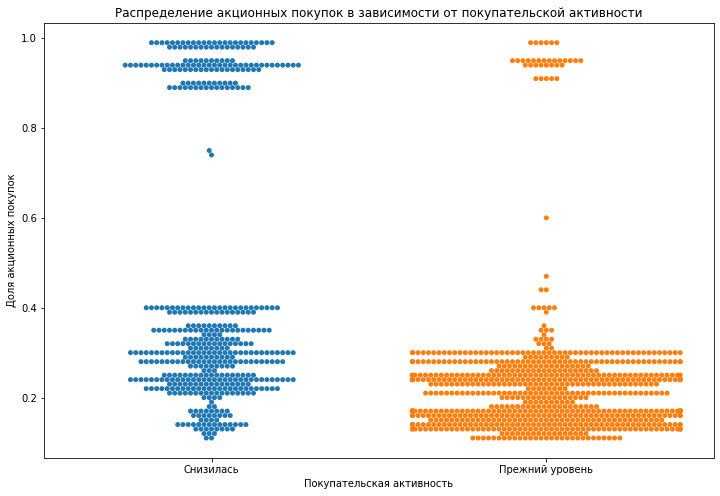

In [63]:
plt.figure(figsize=(12, 8))
ax = sns.swarmplot(data=df, x='покупательская_активность', y='акционные_покупки')
ax.set(xlabel='Покупательская активность', 
       ylabel='Доля акционных покупок', 
       title='Распределение акционных покупок в зависимости от покупательской активности')

In [64]:
segment = df.query('акционные_покупки > 0.7 and покупательская_активность == "Снизилась"')
segment['акционные_покупки'].count()

133

In [65]:
X = df.drop(['покупательская_активность'], axis=1)
proba = (randomized_search.best_estimator_['models']
         .predict_proba(pipe_final.named_steps['preprocessor'].transform(X))
        )[:,1]
df['proba'] = proba
df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,минут_за_предыдущий_месяц,минут_за_текущий_месяц,прибыль,proba
1,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16,0.910132
2,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13,0.417574
3,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87,0.792527
4,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21,0.960087
5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95,0.660935


[Text(0.5, 0, 'Вероятность присвоения покупателю класс 1 (активность снизилась)'),
 Text(0, 0.5, 'Доля акционных покупок'),
 Text(0.5, 1.0, 'Распределение акционных покупок в зависимости от вероятности просвоения класса')]

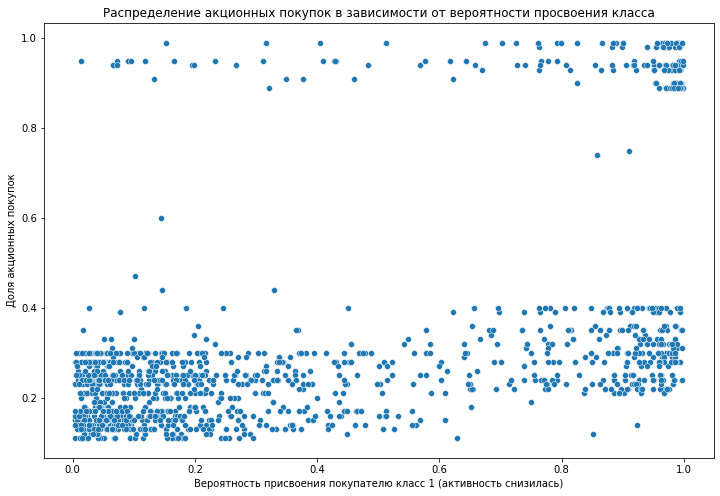

In [66]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=df, x='proba', y='акционные_покупки')
ax.set(xlabel='Вероятность присвоения покупателю класс 1 (активность снизилась)', 
       ylabel='Доля акционных покупок', 
       title='Распределение акционных покупок в зависимости от вероятности просвоения класса')

При большой доли акционных покупок вероятность присвоения к классу 1 никогда не равно 0.

<AxesSubplot:xlabel='прибыль', ylabel='акционные_покупки'>

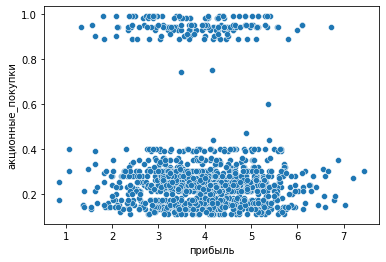

In [67]:
sns.scatterplot(data=df, x='прибыль', y='акционные_покупки')

<AxesSubplot:xlabel='proba', ylabel='акционные_покупки'>

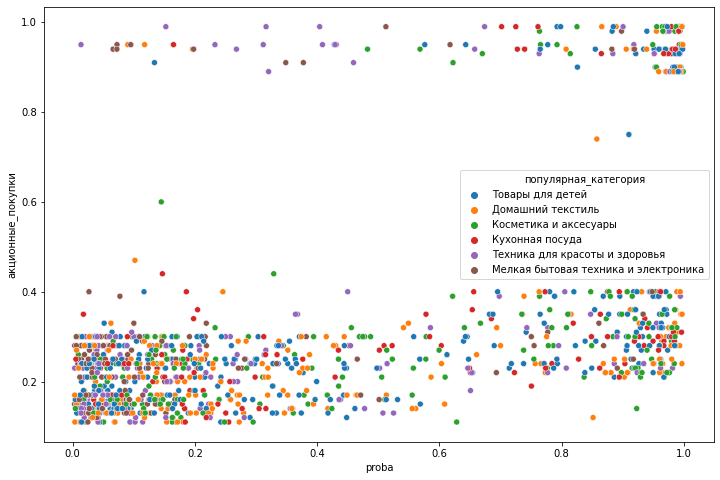

In [68]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, y='акционные_покупки', x='proba', hue='популярная_категория')

In [69]:
df['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Кухонная посуда', 'Техника для красоты и здоровья',
       'Мелкая бытовая техника и электроника'], dtype=object)

<AxesSubplot:xlabel='популярная_категория', ylabel='акционные_покупки'>

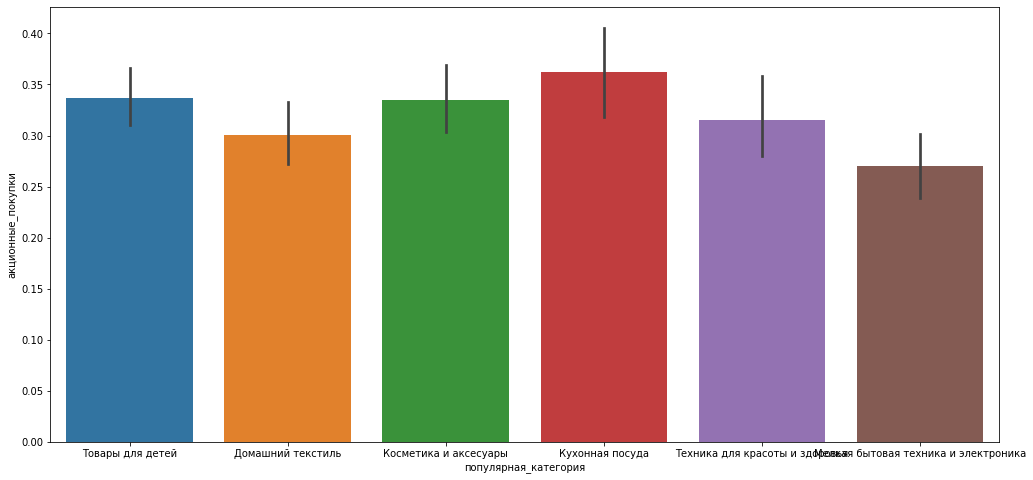

In [70]:
# среднее значение доли покупок по акции в зависимость от категории товара
plt.figure(figsize=(17, 8))
sns.barplot(data=df, y='акционные_покупки', x='популярная_категория')

Самое большое среднее значение покупок по акции в категории кухонная посуда.

<AxesSubplot:xlabel='выручка_за_препредыдущий_месяц', ylabel='акционные_покупки'>

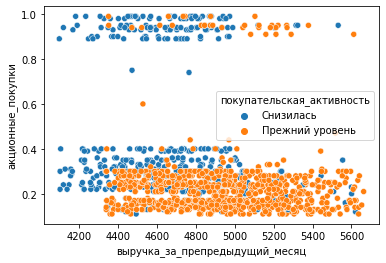

In [71]:
sns.scatterplot(data=df, y='акционные_покупки', x='выручка_за_препредыдущий_месяц', hue='покупательская_активность')

<AxesSubplot:xlabel='выручка_за_предыдущий_месяц', ylabel='акционные_покупки'>

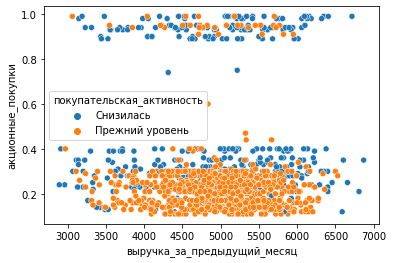

In [72]:
sns.scatterplot(data=df, y='акционные_покупки', x='выручка_за_предыдущий_месяц', hue='покупательская_активность')

<AxesSubplot:xlabel='выручка_за_текущий_месяц', ylabel='акционные_покупки'>

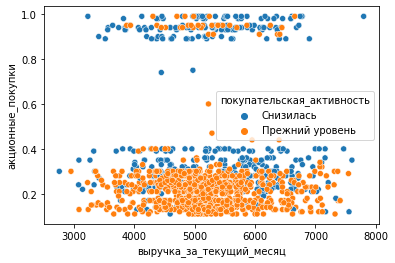

In [73]:
sns.scatterplot(data=df, y='акционные_покупки', x='выручка_за_текущий_месяц', hue='покупательская_активность')

Значение выручки за предыдущий и текущий месяцы варьируется в большем пределе, чем раньше. Минимальное значение снизилось до менее 3000.

Text(0.5, 1.0, 'Соотношение разрешивших отправку сообщений к неразрешивним')

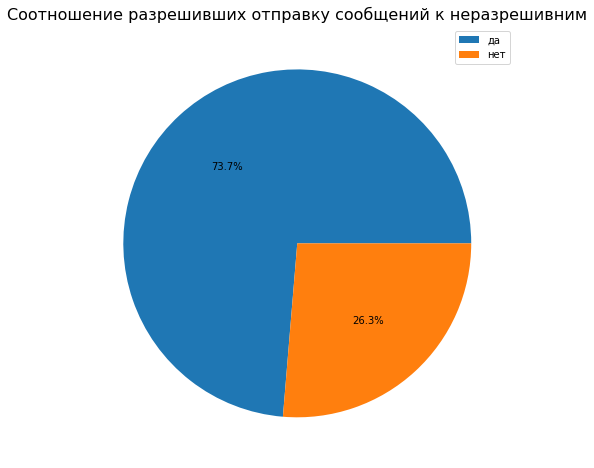

In [74]:
(segment
 .pivot_table(index='разрешить_сообщать', values='акционные_покупки', aggfunc='count')
 .plot(kind='pie', y='акционные_покупки', figsize=(8, 8), autopct='%1.1f%%', labeldistance=None)
)
plt.ylabel('')
plt.title('Соотношение разрешивших отправку сообщений к неразрешивним', fontsize=16)

In [75]:
segment.groupby('маркет_актив_тек_мес')['маркет_актив_тек_мес'].count()

маркет_актив_тек_мес
3    33
4    72
5    28
Name: маркет_актив_тек_мес, dtype: int64

In [76]:
segment.groupby('популярная_категория')['популярная_категория'].count().sort_values()

популярная_категория
Мелкая бытовая техника и электроника     7
Техника для красоты и здоровья          12
Кухонная посуда                         19
Домашний текстиль                       25
Косметика и аксесуары                   26
Товары для детей                        44
Name: популярная_категория, dtype: int64

Всего в сегменте , чья активность снизилась и которые совершают покупки по акции, 134 покупателя. 73% из них разрешили отправку сообщений. С большинством покупателей маркетинговые взаимодействия просисходят 4 раза. Самая популярная категория товаров - для детей, как и для всей пользователей. Меньше всего в сегменте покупают мелкую бытовую технику и электронику.

Один из способов увеличения покупательской активности в этом сегменте может быть увеличение количества рассылок с действующими акциями на неоплаченные товары в корзине или предложения по товарам той же категории.

## Общий вывод

Для достижения поставленной цели - разработка персонализированных предложений, были проведены следующие этапы:

1) Поготовка данных: загрузка и изучение общей информации из представленных данных.

2) Предобработка данных: удаление дубликатов, переименование столбцов.

3) Исследовательский анализ данных: изучение всех представленных характеристик, на основании которого, можно сделать выводы:
- Преобладают покупатели со стандартным уровнем сервиса, с согласием на рассылку сообщений. 
- Количество меркетинговых коммуникаций в месяц около 4. 
- Большинство покупателей зарегистрировалось на сайте около 1-2 года назад. 
- Присутствует группа покупателей, которые покупают товары, в основном, только по акции. 
- Самая популярная категория товаров - товары для детей. Наименьшим спросом обладает категория кухонной посуды. 
- Большинство покупателей смотрят по 2-4 категории за визит и 5-11 станиц, в корзине до 5 неоплаченных товаров. 
- На сайте происходят сбои.
- Среднемесячная выручка за 3 месяца составляет 4500-5300 руб.
- Среднее время, проведенное на сайте за последнии 2 месяца составляет от 10 до 16 минут.   

4) Корреляционный анализ всех характеристик, выявление мультиколлинеарности признаков, которая была устранена.

5) Создание итогового пайплана для выбора лучшей модели. Лучшая модель - логистическая регрессия.

6) Анализ важности признаков лучшей модели.

7) Сегментация покупателей. Выделена группа покупателей с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. Всего их на данный момент 134. Анализ важности признаков показал, что чем больше значение покупок по акции, тем больше веростность, что покупательская активность снизиться. Самое большое среднее значение покупок по акции в категории кухонная посуда.

8) Рекомендации. Для поддержания покупательской активности, следует увеличить число маркетинговых коммуникаций, обращая внимание на категории неоплаченных товаров в корзине покупателя. Также, так как число просмотренных на сайте страниц, категорий товаров, количество минут, проведенных на сайте, оказывают большее влияние на покупательскую активность, можно при добавлении какого-либо товара в корзину, предлагать подходящии для него другие товары. Например, при покупке кухонных товаров, предлагать посмотреть еще и домашний текстиль для кухни.